**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

I import packages and set magics. 

Furthermore, I import my models. I have designed three different py-files, so each problem has its own py-file:

In [176]:
# (a) Importing packages
import numpy as np
import matplotlib.pyplot as plt
import scipy as optimize
import matplotlib as cm
import pandas as pd
import math
from tabulate import tabulate
from mpl_toolkits.mplot3d import Axes3D
import sympy as sm
from scipy import optimize


# (b) Autoreload modules
%load_ext autoreload
%autoreload 2

# (c) Import my models
from p1 import TaxGov                       # Problem 1, Question 1-4

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $(1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

I name my model *tg*:

In [134]:
# (a) Defining the model for 
tg = TaxGov()

I verify that the optimal labor supply is given by $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$ by runing two codes:

* First, I simply plug in the given parameters in the $L^*(\tilde{w})$

* Secondly, I use an *optimization code* to find the optimal value of $L^*(\tilde{w})$ with the bounds of labour, $L\in[0,24]$. I use Nelder-Mead to optimize.

In [135]:
# (b) L* based on the given parameters
print('Based on the givne parameters, L*(w_tilde) is given by:')
tg.L_star(tg.wtilde()) # Verify this

Based on the givne parameters, L*(w_tilde) is given by:


15.30165022719559

In [136]:
# (c) Verification of L*
print('Based on an optimization code, L*(w_tilde) is given by:')
tg.optimize1()['x']

Based on an optimization code, L*(w_tilde) is given by:


array([15.30122671])

Since both estimates are 15.3, I verify nummerically that $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

In my model, *tg*, I have made an option for $\tilde{w}$, so if I define a value of w other than the given value ($w=0.3$), the parameter will not use the default value of w.

To illustrate how $L^*(\tilde{w})$ depends on w, I plot the $L^*$ for 1.000 different values of w:

c:\Users\CAAL\Dropbox\Polit\Kandidat\3. semester\Introduction to programming and numerical analysis\projects-2023-python-1\examproject\p1.py:40: RuntimeWarning: invalid value encountered in double_scalars
  return (-par.kappa+np.sqrt(par.kappa**2+4*(par.alpha/par.nu)*wtilde**2))/(2*wtilde)


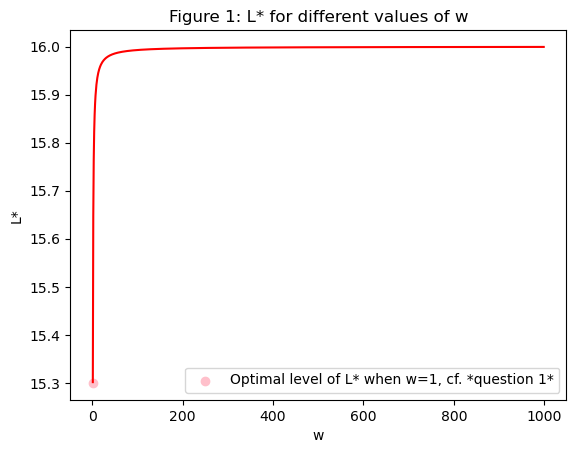

In [137]:
# (a) Defining a range of w (0, 1000)
w = np.array(range(0,10**3))

# (b) Plotting L* as a function of w_tilde which is given by w (varies)
Lstars = [tg.L_star(tg.wtilde(w=w_i)) for w_i in w]
plt.plot(w, Lstars, color='red')

# (c) Adjusting the plot
plt.xlabel('w')
plt.ylabel('L*')
plt.title('Figure 1: L* for different values of w')
plt.scatter(1, 15.30, color='pink', label='Optimal level of L* when w=1, cf. *question 1*')
plt.legend()
plt.show()

L* depends on w indirectly through $\tilde{w}$. Based on **Figure 1**, I can tell that L* converges towards 16, which indicates that the wage have only influence over the optimal level of labor supply, until it reaches approximately 100.This inciates, that the workers will not work more than 16 hours per day nomatter the size of the wage.


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


I use $L^*$ from *question 2*, since $\tau$ still varies.

In *question 1-2*, I defined as $G\in\left\{1.0 , 2.0\right\}$. Now, G depends on tau, cf. $G = \tau w L^{\star}((1-\tau)w)$, and so I need to redefine G, so it become dependent of $\tau$, $w$ and $L$:

I start by defining the range of $\tau\in\left\{0, 1 \right\}$, since  $\tau$ is the tax rate on labor-income. Therefore, $\tau$ is a percentage, and so it cannot go beyond 1.

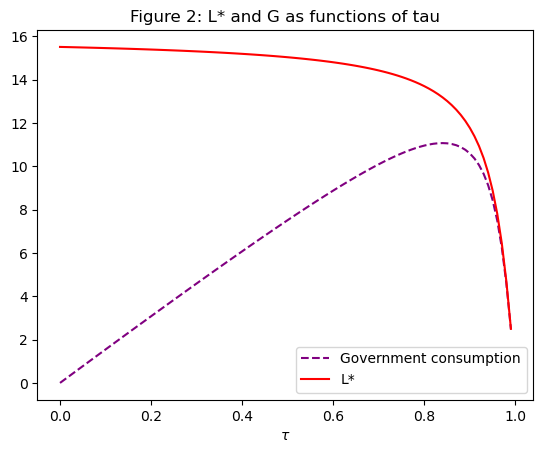

In [138]:
# (a) Defining the range of tau.
tau = np.array(np.arange(0., 1., 0.01))

# (b) Defining L* and G as functions of tau
Lstars = [tg.L_star(tg.wtilde(tau=tau_i)) for tau_i in tau]
Gs = [tg.par.G3(tau[i],Lstars[i]) for i in range(len(tau))]

# (c) Plotting L* and G as functions of tau
plt.plot(tau, Gs, label='Government consumption', color = 'purple', linestyle = '--')
plt.plot(tau, Lstars, label = 'L*', color = 'red')

# (d) Adjusting the plot
plt.title('Figure 2: L* and G as functions of tau')
plt.xlabel(r'$\tau$')
plt.legend()

**Figure 2** shows that when the tax rate on labor-income tax increases, the optimal working hours decreases caused by a lower incentive to work. With no income tax, $tau=0$, the workers have the highest incentive to work, and so they work 16 hours aday. 

Furthermore, **Figure 2** illustrates the government consumption, which depends on labor-income tax rate, $\tau$, and labor, $l$. When the tax increases, the Government consumption increases. However, the income tax decreases the working hours, which decreases the Government consumption. The figure indicates that Government spending is maximized with a labor-income tax rate at 85 pct.

In the next question, I illustrate the maximized worker utility based on the tax rate.

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In the py-file, I code a new optimizer so I can find the socially optimal tax rate that maximizes the worker utility:

In [139]:
# (a) Finding the socially optimal tax rate:
tg.optimize2()['x']

array([0.51453125])

The socially optimal labor-income tax rate is 51.5 pct., which I will illustrate below:

c:\Users\CAAL\Dropbox\Polit\Kandidat\3. semester\Introduction to programming and numerical analysis\projects-2023-python-1\examproject\p1.py:114: RuntimeWarning: divide by zero encountered in log
  V = lambda tau: -(np.log(C_tau(tau, self.L_star(self.wtilde(tau=tau))) ** par.alpha * par.G3(tau, self.L_star(self.wtilde(tau=tau))) ** (1 - par.alpha)) - par.nu * self.L_star(self.wtilde(tau=tau)) ** 2 / 2)


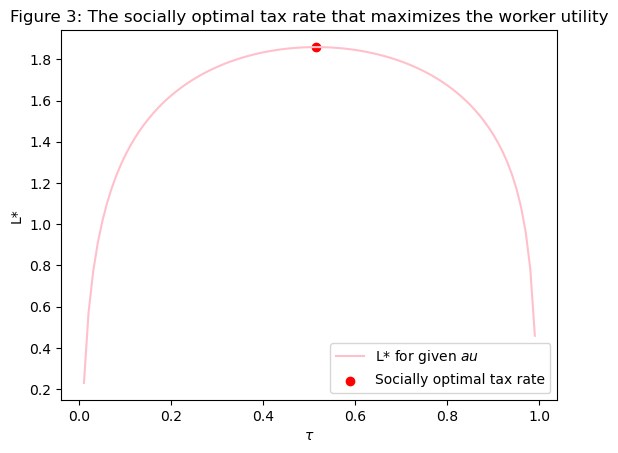

In [140]:
# (a) defining tau to be 0-1
tau = np.array(np.arange(0., 1., 0.01))

# (b) Defining the workers utility function 
V_list = [-tg.V_tau(tau = tau_i) for tau_i in tau]

# (c) Plotting L* as functions of tau
plt.plot(tau, V_list, label = 'L* for given $\tau$', color = 'pink')
plt.scatter(0.515, 1.86, color='red', marker='o', label = 'Socially optimal tax rate')

# (d) Adjusting the plot
plt.title('Figure 3: The socially optimal tax rate that maximizes the worker utility')
plt.xlabel(r'$\tau$ ')
plt.ylabel('L*')
plt.legend()

**Figure 3** illustrates aswell that the socially optimal tax rate for worker utility is 51.5 pct.

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{\sigma-1} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

The assignment states that I have to answer question 5-6 with a *general formulation* I assume that I must answer this with symbols. 

Therefore, I write my coding in this file and define a set of parameters as symbols:

In [141]:
# (a) defining the parameters
alpha = sm.symbols('alpha')             
kappa = sm.symbols('kappa')             # free private consumption component
v = sm.symbols('v')                     # disutility of labor scaling
w = sm.symbols('w')                     # labor-income
tau = sm.symbols('tau')                 # labor-income tax
C = sm.symbols('C')                     # consumption
L = sm.symbols('L')                     # Labor
L_star = sm.symbols('L^*')              # Optimal labor
sigma = sm.symbols('sigma')
rho = sm.symbols('rho')
epsilon = sm.symbols('epsilon')
G = sm.symbols('G')

# (b) defining the objective function:
objective = ((alpha * C ** ((sigma -1)/ sigma) + (1 - alpha) * G ** (sigma / (sigma - 1))) ** (1 - rho) - 1) / (1 - rho) - v * L ** (1 + epsilon) / (1 + epsilon)
objective

-L**(epsilon + 1)*v/(epsilon + 1) + ((C**((sigma - 1)/sigma)*alpha + G**(sigma/(sigma - 1))*(1 - alpha))**(1 - rho) - 1)/(1 - rho)

In [142]:
# (a) Defining the consumption function:
consumption = sm.Eq(C, kappa + (1-tau)*w*L)
cons = kappa + (1-tau)*w*L

# (b) vizualising the consumption function
consumption

Eq(C, L*w*(1 - tau) + kappa)

In [143]:
# (a) substituting C into objective function:
objective_L = objective.subs(C, cons)
objective_L

-L**(epsilon + 1)*v/(epsilon + 1) + ((G**(sigma/(sigma - 1))*(1 - alpha) + alpha*(L*w*(1 - tau) + kappa)**((sigma - 1)/sigma))**(1 - rho) - 1)/(1 - rho)

In [193]:
# (a) take the derivative wrt. L
FOC = sm.diff(objective_L, L)
FOC

alpha*w*(1 - tau)*(sigma - 1)*(G**(sigma/(sigma - 1))*(1 - alpha) + alpha*(L*w*(1 - tau) + kappa)**((sigma - 1)/sigma))**(1 - rho)*(L*w*(1 - tau) + kappa)**((sigma - 1)/sigma)/(sigma*(G**(sigma/(sigma - 1))*(1 - alpha) + alpha*(L*w*(1 - tau) + kappa)**((sigma - 1)/sigma))*(L*w*(1 - tau) + kappa)) - L**(epsilon + 1)*v/L

Now, I have the code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this, which I do by solving for L:

In [197]:
# (a) Solving with L
FOC_sol = sm.solve(FOC, G)
FOC_sol

[((-L*alpha*tau*w + L*alpha*w + alpha*kappa - (alpha*w*(L*sigma*tau**2*w - 2*L*sigma*tau*w + L*sigma*w - L*tau**2*w + 2*L*tau*w - L*w - kappa*sigma*tau + kappa*sigma + kappa*tau - kappa)/(L**epsilon*sigma*v*(-L*tau*w + L*w + kappa)**((sigma + 1)/sigma)))**(1/rho)*(-L*tau*w + L*w + kappa)**(1/sigma))/((alpha - 1)*(-L*tau*w + L*w + kappa)**(1/sigma)))**((sigma - 1)/sigma)]

Then, I can plug in the given parameters from set 1:

In [195]:
# (a) plug in the general parameters:
FOC_sol = FOC_sol[0].subs(tau, 0.515)           # estimated in question 4
FOC_sol = FOC_sol.subs(w, 1)
FOC_sol = FOC_sol.subs(v, 1/(2*16**2))
FOC_sol = FOC_sol.subs(alpha, 0.5)
FOC_sol = FOC_sol.subs(kappa, 1)

# (b) plug in set_1 parameters:
FOC_sol_1 = FOC_sol.subs(sigma, 1.001)
FOC_sol_1 = FOC_sol_1.subs(rho, 1.001)
FOC_sol_1 = FOC_sol_1.subs(epsilon, 1.0)

# (c) simpliying the equation
sm.simplify(FOC_sol_1)

IndexError: list index out of range

Then, I plug in the other parameters from set 2:

In [ ]:
# (a) parameters from set 2:
FOC_sol_2 = FOC_sol.subs(sigma, 1.5)
FOC_sol_2 = FOC_sol_2.subs(rho, 1.5)
FOC_sol_2 = FOC_sol_2.subs(epsilon, 1.0)

# (c) simpliying the equation
sm.simplify(FOC_sol_2)

Unfortunately, I haven't have time to solve this question, due to time limitations. However, the method is to some extend correct.

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [198]:
# (a) import model
from p1 import TaxGov_sym
model_sym = TaxGov_sym()

# (b) socially optimal tax rate
model_sym.optimize3()['x']

AttributeError: 'types.SimpleNamespace' object has no attribute 'G'

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

In [199]:
# (a) Importing packages
import numpy as np
import matplotlib.pyplot as plt
import scipy as optimize
import matplotlib as cm
import pandas as pd
import math
from tabulate import tabulate
from mpl_toolkits.mplot3d import Axes3D
import sympy as sm
from scipy import optimize


# (b) Autoreload modules
%load_ext autoreload
%autoreload 2

# (c) Import my model
from Assignmenttwo import hairdresser       # Problem 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

First of all, I import the model and name it *model_hair*:

In [200]:
# (a) Importing the model
from Assignmenttwo import hairdresser

# (c) nameing the model
model_hair = hairdresser()

Then, I use the given parameters to create a plot for $\ell_t$:

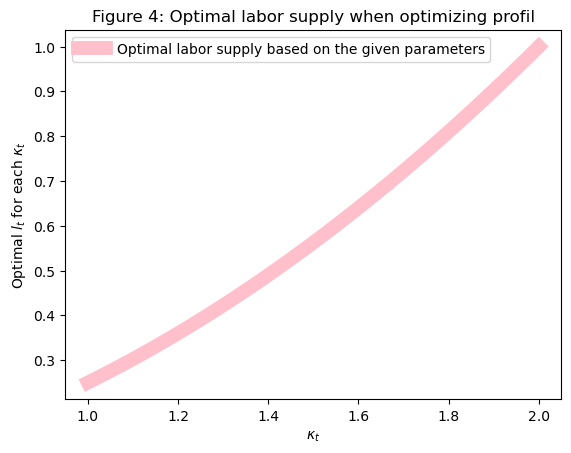

In [201]:
# (a) Importing the optimal labor supply based on kappa:
model_hair.optimal_l_t()

# (b) Creating a plot
plt.plot(model_hair.par.kappa_t, model_hair.optimal_l_t(), label = 'Optimal labor supply based on the given parameters', linewidth = 10, color = 'pink')

# (c) Adjusting the plot
plt.xlabel(r'$\kappa_t$')
plt.ylabel(r'Optimal $l_t$ for each $\kappa_t$')
plt.title('Figure 4: Optimal labor supply when optimizing profil')
plt.legend()
plt.show() 

**Figure 4** illustrates, that when $\kappa_t\ increases, the optimal labor supply increases, which makes sence, since $l_t$ is positive dependent of $\kappa_t$:

$$
\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}
$$

To verify that $\ell_{t}$ is given as above, I find the optimal value of $\ell_t$ for each $\kappa_t\ value by runing the optimize code:

c:\Users\CAAL\Dropbox\Polit\Kandidat\3. semester\Introduction to programming and numerical analysis\projects-2023-python-1\examproject\Assignmenttwo.py:39: RuntimeWarning: divide by zero encountered in power
  p_t = kappa_t * y_t ** (- par.eta)
c:\Users\CAAL\Dropbox\Polit\Kandidat\3. semester\Introduction to programming and numerical analysis\projects-2023-python-1\examproject\Assignmenttwo.py:42: RuntimeWarning: invalid value encountered in multiply
  pi_t = p_t * y_t - par.w * l_t


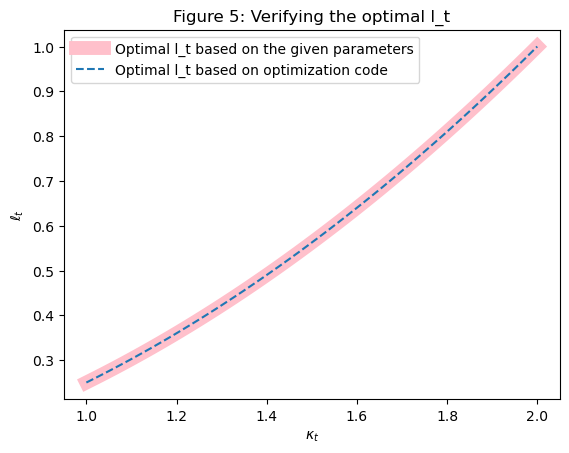

In [202]:
# (a) Defining an empty list
lt_stars = list()
profits = list()

# (b) importing the dictionary from my py-file
result_dictionary = model_hair.opti_employees()
result_dictionary

# (c) Varying kappa_t in and add the results to the dictionary
for k in list(result_dictionary.keys()):
    lt_stars.append(result_dictionary[k]['x'][0])
    profits.append(-result_dictionary[k]['fun'])


# (d) Creating a figure consisting of both plots:
plt.plot(model_hair.par.kappa_t, model_hair.optimal_l_t(), label = 'Optimal l_t based on the given parameters', linewidth = 10, color = 'pink')
plt.plot(model_hair.par.kappa_t, lt_stars, linestyle = '--', label = 'Optimal l_t based on optimization code')

# (e) Adjusting the figure
plt.xlabel(r'$\kappa_t$')
plt.ylabel(r'$\ell_t$')
plt.title('Figure 5: Verifying the optimal l_t')
plt.legend()
plt.show() 

Based on the plots in **Figure 4**, I can varify that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$, since the graphs are showing the exact same patterns when varying $\kappa_t$.

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [203]:
# (a) First, I import the model:
dy_model = dynamic_hairdresser()

I have chosen to find the K that does not affect the results with a visual inspection. Therefore, I plot *H* and vary K:

c:\Users\CAAL\Dropbox\Polit\Kandidat\3. semester\Introduction to programming and numerical analysis\projects-2023-python-1\examproject\Assignmenttwo.py:200: RuntimeWarning: divide by zero encountered in long_scalars
  return 1 / K * np.sum(m)
c:\Users\CAAL\Dropbox\Polit\Kandidat\3. semester\Introduction to programming and numerical analysis\projects-2023-python-1\examproject\Assignmenttwo.py:200: RuntimeWarning: invalid value encountered in double_scalars
  return 1 / K * np.sum(m)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


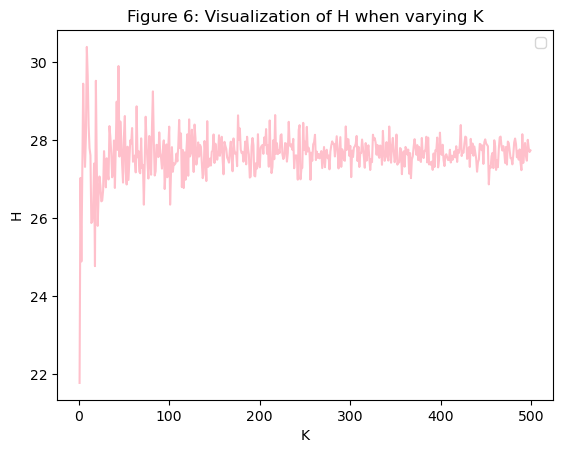

In [204]:
# (a) Defining a range of - skal kun være på 500
K = np.array(range(0,500))

# (b) Plotting L* as a function of w_tilde which is given by w (varies)
H_ = [dy_model.H1(K_i) for K_i in K]
plt.plot(K, H_, color='pink')

# (c) Adjusting the plot
plt.xlabel('K')
plt.ylabel('H')
plt.title('Figure 6: Visualization of H when varying K')
plt.legend()
plt.show()

Based on a visual inspection of **Figure 6**, I find that when $K=500$, $K$, the approximation is good enough to not affect my results substantially.

I calculate $\ell_t$ with K=500:

In [205]:
# (a) calculate H
dy_model.H1(K=500)

27.359578232289593

I find that when k=500, $\ell_t=27.6$

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

I continue using K=500:

In [206]:
# (a) Calculation of H:
dy_model.H2(K=500, delta=0.05)

28.428888887185092

The latter result gives a profitability of 28.6, which is larger than 27.6. Therefore, the new policy improves profitability

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

First of all, I start by importing a function of delta.
Then, I use the optimizer to find the optimal value of $\Delta$
Last of all, I pug it into H:

In [207]:
# (a) Defining an equation
eq_delta = lambda delta: -dy_model.H2(K=500, delta=delta)

# (b) guess
guess = 0.05

# (b) Optimize
sol = optimize.minimize(eq_delta, guess, bounds =((0,None),), method='Nelder-Mead')

# (c) optimal delta
sol['x']


array([0.04625])

Then, I plugg in the solution in H:

In [208]:
# (a) use delta = 0.46
dy_model.H2(K=500, delta=0.04625)

28.250821609091524

My results seem a litte wierd, since profitability was larger with $\Delta=0.05$ than $\Delta=0.046$

Unfortunately, I don't have time to dig into the problem.


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



An alternative policy that might improve the profitability is to have some employees initially. Therefore, the initial value is set to $\ell_t=5$ instead of $\ell_t=0$

In [177]:
# (a) Start with 2 employees:
dy_model.H3(K=500, delta=0.05)

28.614247357160963

By starting with five employees instead of 0, the profit is given by 28.6. Therefore, it is more profitable to run with some employees from the very begining.

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [209]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

*1.1: Bounds*: 
I define the bounds according to the assignment text: $x_1,x_2 \in  [-600,600]$

in [-600, 600] x [-600,600]


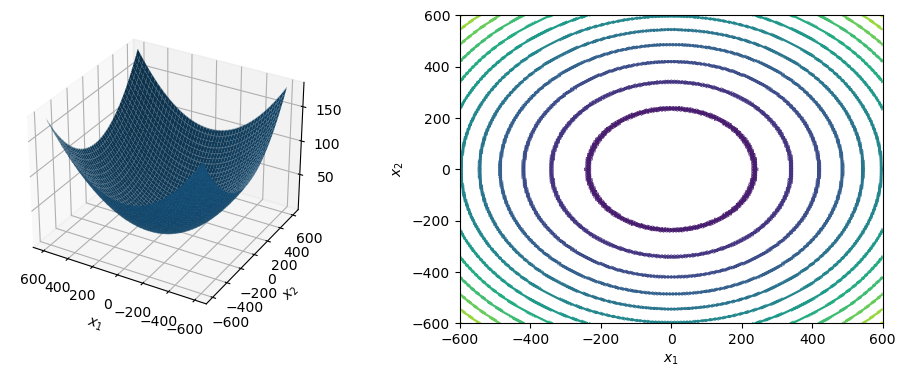

in [-10, 10] x [-10,10]


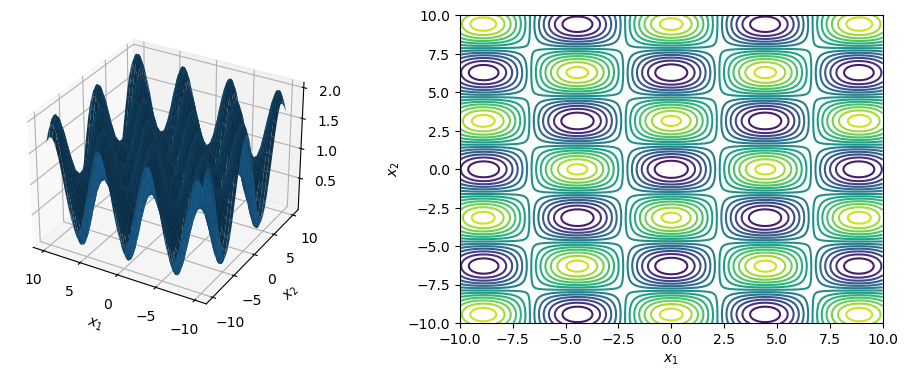

in [-1, 1] x [-1,1]


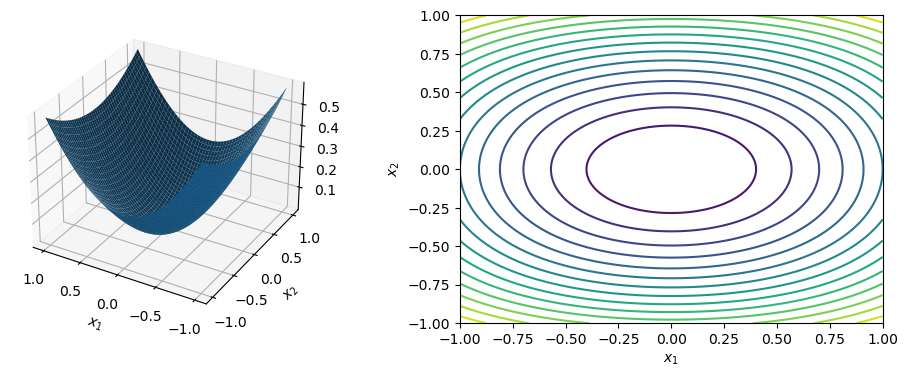

In [210]:
# (a) setting the bounds to -600 and 600 as the assignment states
for bound in [600, 10, 1]:
    print(f'in [{-bound}, {bound}] x [{-bound},{bound}]')

    # (a.i) Defining the grid for the figures between the bounds
    x1_vec = np.linspace(-bound,bound,1000)
    x2_vec = np.linspace(-bound,bound,1000)
    x1_grid_griewank, x2_grid_griewank = np.meshgrid(x1_vec, x2_vec, indexing='ij')
    griewank_grid = griewank_(x1_grid_griewank, x2_grid_griewank)

    # (a.ii) Defining the figure
    figures = plt.figure(figsize=(12,4))
    ax = figures.add_subplot(1, 2, 1, projection='3d')
    cs = ax.plot_surface(x1_grid_griewank, x2_grid_griewank, griewank_grid)

    # (a.iii) Adjusting the figure
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.invert_xaxis()
    
    # illustrating the contours as 2d-plots
    ax = figures.add_subplot(1, 2, 2)
    cs = ax.contour(x1_vec, x2_vec,griewank_grid, levels=15)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    
    plt.show()


*1.2: Warm-up interactions*: I chose some starting values. 

In [211]:
# (a) Random seed
np.random.seed(1996) 

# (b) Defining x_ini_0
x_ini_0 = -600 + 1200 * np.random.uniform(size = (1000, 10))
x0 = [-1.5,-1]

# (c) defining x_ini 
x_ini = np.empty((1000, 10))

# (d) defining f_ini
f_ini = np.empty(1000)

# (e) printing the minimum value of x_ini_0
print(f'min = {np.min(x_ini_0):.2f}, max = {np.max(x_ini_0):.2f}')

min = -599.99, max = 599.83


A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

Then, I will solve it with Nelder-Mead:

In [ ]:
# template

for k, x_ini in enumerate(x_ini_0):

    if k < 10: # skift boundary
        result = optimize.minimize(griewank,x0,method='BFGS',tol=1e-8)
        if 
        # skriv kode til e, f, g
        if # f betingelse:
            #set xstar
        
        if # g betingelse
            break
    else:
        #skriv kode til c,d,e,f,g

In [ ]:
# (a) initializing
f_opt = np.inf
x_opt = np.nan


# (b) Runing the code
for k, x_ini in enumerate(x_ini_0):
        
        if k < 10: 
    # (b.i) optimize
            res = optimize.minimize(griewank, x0, method = 'Nelder-Mead')
        x_ini[k,:] = res.x
        f = res.fun


        else:
    # if-statement
    if k < 1000:
            f_opt = f
            x_opt = x_ini[k,:]


# (c) printing the best solution
print(f'\nbest solution:\n x = ({x_opt[0]:7.1f},{xopt[1]:7.1f}) -> f = {fopt:12.1f}')

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [ ]:
# write your code here